In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Loan_dataset_full.csv')

In [5]:
df.head(10)

,Employees,Monthly_Profit,Credit_History,Customers,Export_Abroad,Loan_Amount,Payment_Terms,Gender,Education,Married,Spouse_Income,Request_Approved
0,1,2014,1,Large,No,113.000000,360.0,Male,Graduate,Yes,2925.0,N
1,0,1800,0,Large,No,93.000000,360.0,Male,Not Graduate,Yes,2934.0,N
2,0,2875,1,Medium,No,105.000000,360.0,Male,Not Graduate,Yes,1750.0,Y
3,0,5000,1,Small,No,132.000000,360.0,Female,Graduate,No,0.0,Y
4,1,1625,1,Large,No,96.000000,360.0,Male,Graduate,Yes,1803.0,Y
5,0,4000,1,Small,No,140.000000,360.0,Male,Graduate,No,2500.0,Y
6,0,2000,1,Large,No,147.534908,360.0,Male,Not Graduate,No,0.0,N
7,0,3762,1,Small,No,135.000000,360.0,Female,Graduate,No,1666.0,Y
8,0,2400,0,Large,No,104.000000,360.0,Female,Graduate,No,1863.0,N
9,0,20233,1,Small,No,480.000000,360.0,Male,Graduate,No,0.0,N


variance: 32521013.49671322


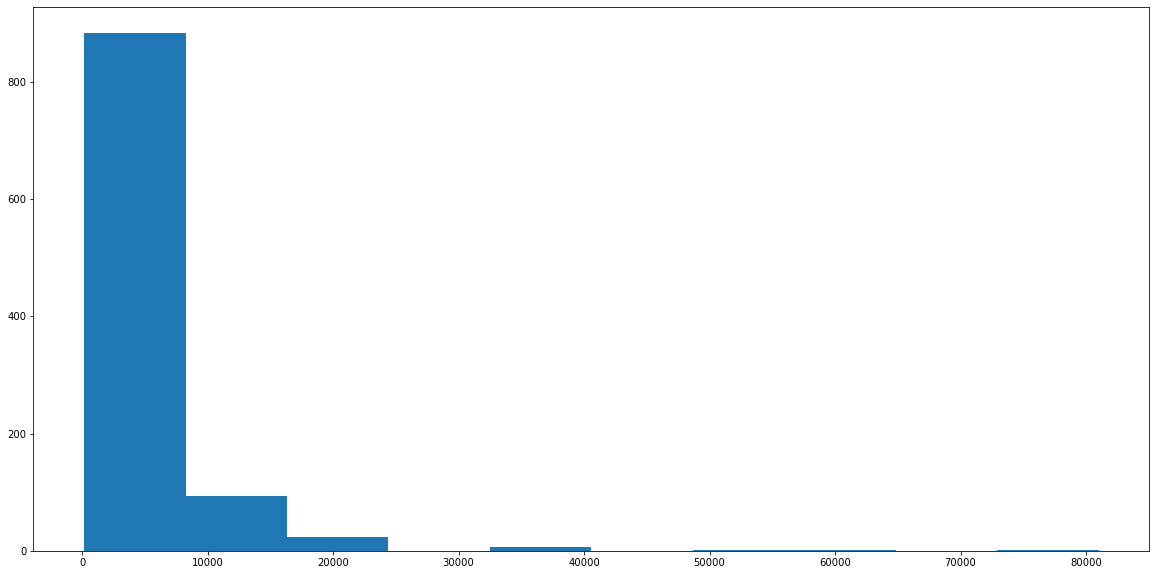

In [6]:
plt.figure(figsize=(20,10))
plt.hist(df['Monthly_Profit'])

print(f"variance: {np.var(df['Monthly_Profit'])}")


variance: 9180506.990803955


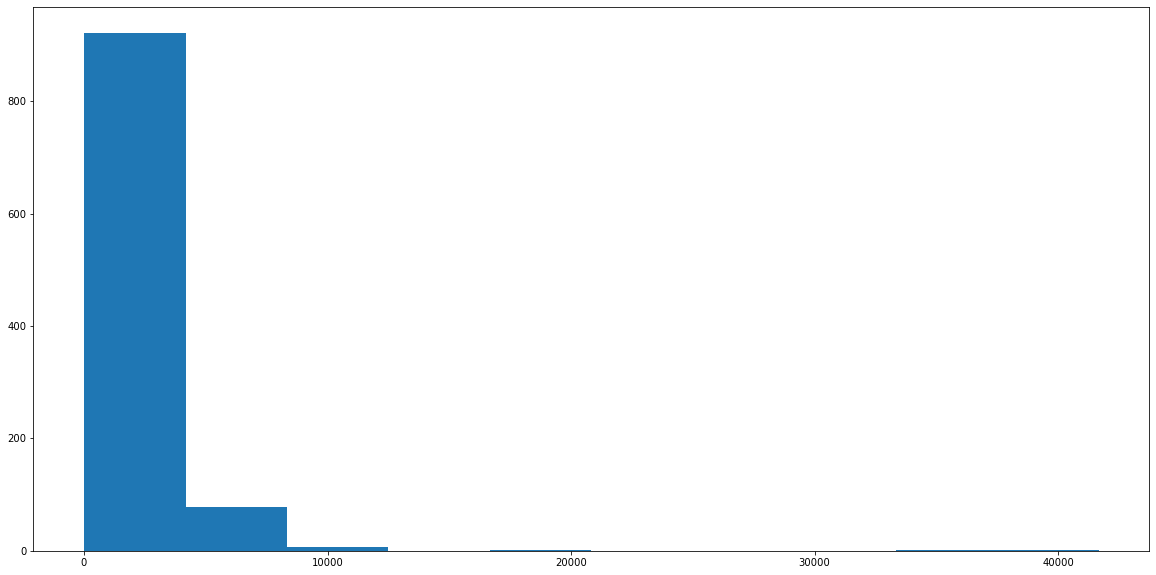

In [7]:
plt.figure(figsize=(20,10))
plt.hist(df['Spouse_Income'])

print(f"variance: {np.var(df['Spouse_Income'])}")


variance: 7312.148677687121


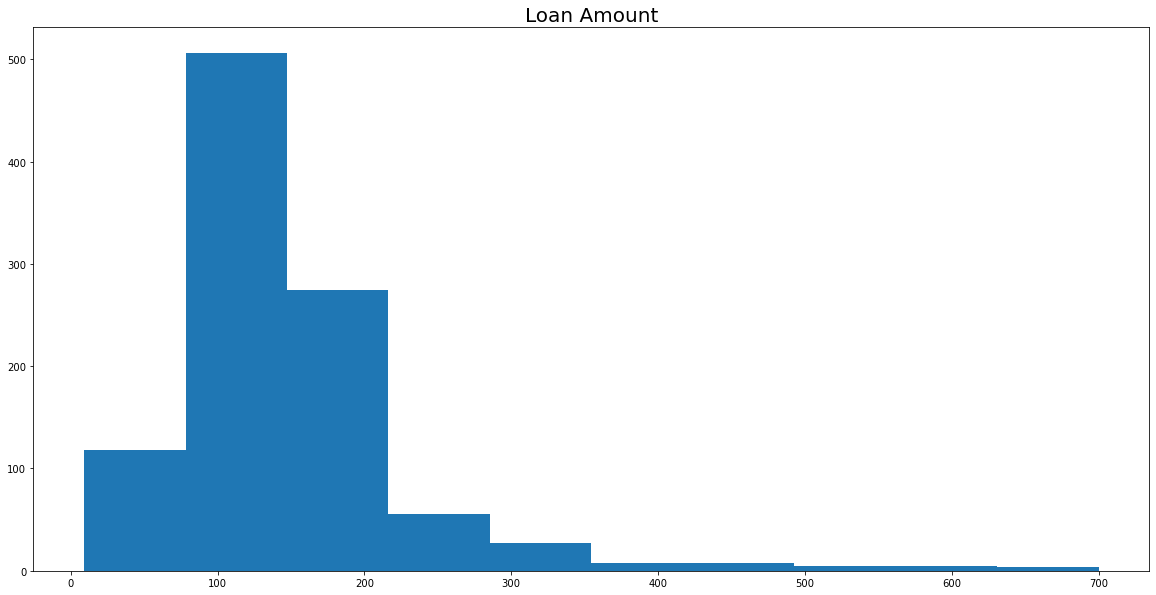

In [8]:
plt.figure(figsize=(20,10))
plt.title("Loan Amount", fontsize=20)
plt.hist(df['Loan_Amount'])

print(f"variance: {np.var(df['Loan_Amount'])}")


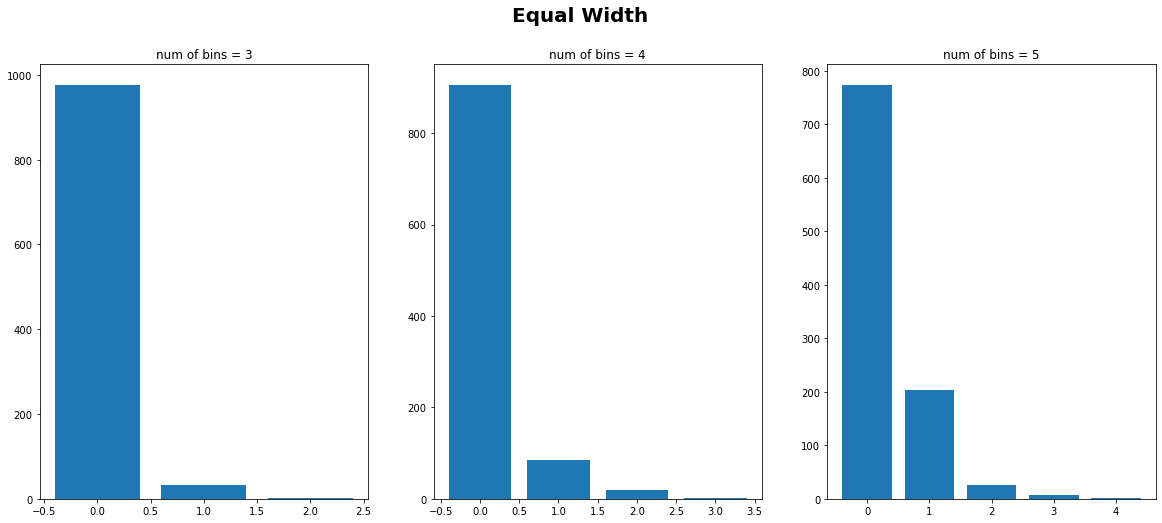

<Figure size 1440x1440 with 0 Axes>

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
plt.figure(figsize=(20,20))
fig.suptitle('Equal Width', size=20, weight='bold')

for idx, num_of_bins in enumerate([3, 4, 5]):
    width = (max(df['Loan_Amount'])-min(df['Loan_Amount'])) / (num_of_bins - 1) 

    bins = np.zeros(num_of_bins)
    for row in df['Loan_Amount']:
        bins[int(row/width)]+=1
    
    axs[idx].set_title(f'num of bins = {num_of_bins}')
    axs[idx].bar(list(range(num_of_bins)), bins)
    


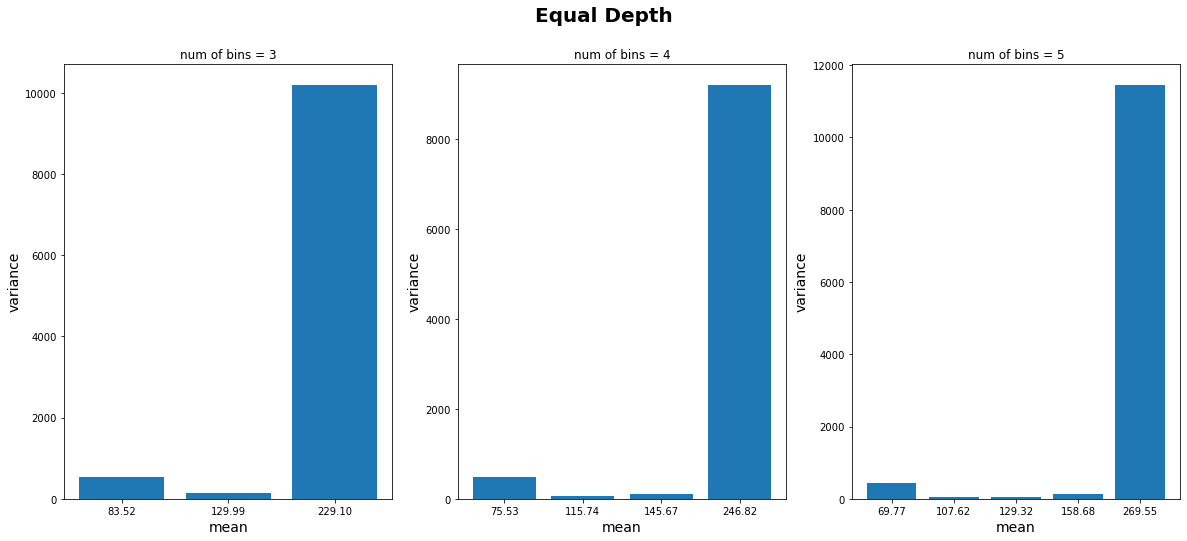

<Figure size 1440x1440 with 0 Axes>

In [10]:
def splitter(lst, num_of_chunks):
    amount_in_bin = int(len(lst) / num_of_chunks)
    res = []
    
    for i in range(num_of_chunks):
        res.append(lst[i*amount_in_bin: (i+1)*amount_in_bin])
        
    return res
    
    
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
plt.figure(figsize=(20,20))
fig.suptitle('Equal Depth', size=20, weight='bold')

for idx, num_of_bins in enumerate([3, 4, 5]):
    chunks = splitter(df['Loan_Amount'].sort_values(ascending=True), num_of_bins)

    x = ['{0:.2f}'.format(np.mean(chunk)) for chunk in chunks]
    y = [np.var(chunk) for chunk in chunks]
    
    axs[idx].set_title(f'num of bins = {num_of_bins}')
    axs[idx].bar(x, y)
    axs[idx].set_xlabel('mean', fontsize=14)
    axs[idx].set_ylabel('variance', fontsize=14)
    

In [11]:
def splitter(lst, num_of_chunks):
    amount_in_bin = int(len(lst) / num_of_chunks)
    res = []
    
    for i in range(num_of_chunks):
        res.append(lst[i*amount_in_bin: (i+1)*amount_in_bin])
        
    return res

In [12]:
def Discretization(col):
    
    plt.figure(figsize=(20,8))
    plt.title(col, fontsize=20)
    plt.hist(df[col])

    print(f"variance: {np.var(df[col])}")

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    plt.figure(figsize=(20,20))
    fig.suptitle('Equal Width', size=20, weight='bold')

    for idx, num_of_bins in enumerate([3, 4, 5]):
        width = (max(df[col])-min(df[col])) / (num_of_bins - 1) 

        bins = np.zeros(num_of_bins)
        for row in df[col]:
            bins[int(row/width)]+=1
        print(bins)
        axs[idx].set_title(f'num of bins = {num_of_bins}')
        axs[idx].bar(list(range(num_of_bins)), bins)

        

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    plt.figure(figsize=(20,20))
    fig.suptitle('Equal Depth', size=20, weight='bold')

    for idx, num_of_bins in enumerate([3, 4, 5]):
        chunks = splitter(df[col].sort_values(ascending=True), num_of_bins)

        x = ['{0:.2f}'.format(np.mean(chunk)) for chunk in chunks]
        y = [np.var(chunk) for chunk in chunks]

        axs[idx].set_title(f'num of bins = {num_of_bins}')
        axs[idx].bar(x, y)
        axs[idx].set_xlabel('mean', fontsize=14)
        axs[idx].set_ylabel('variance', fontsize=14)   

variance: 32521013.49671322
variance: 7312.148677687121
variance: 9180506.990803955


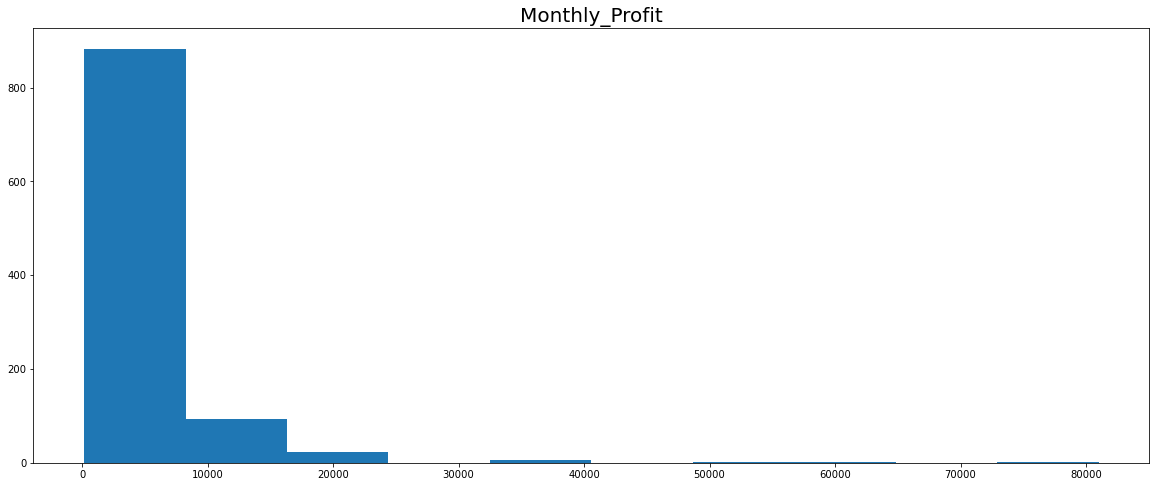

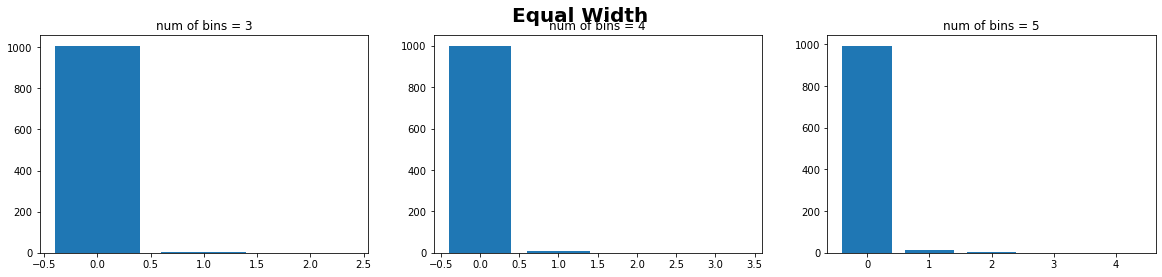

<Figure size 1440x1440 with 0 Axes>

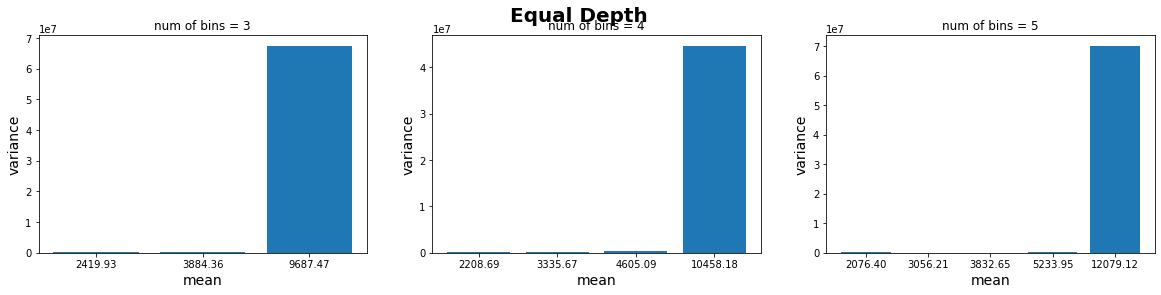

<Figure size 1440x1440 with 0 Axes>

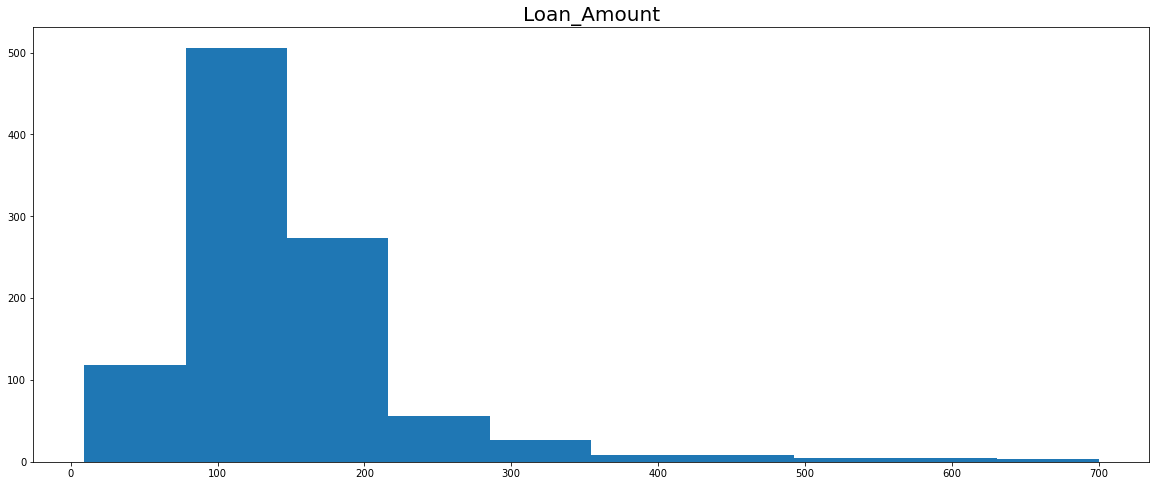

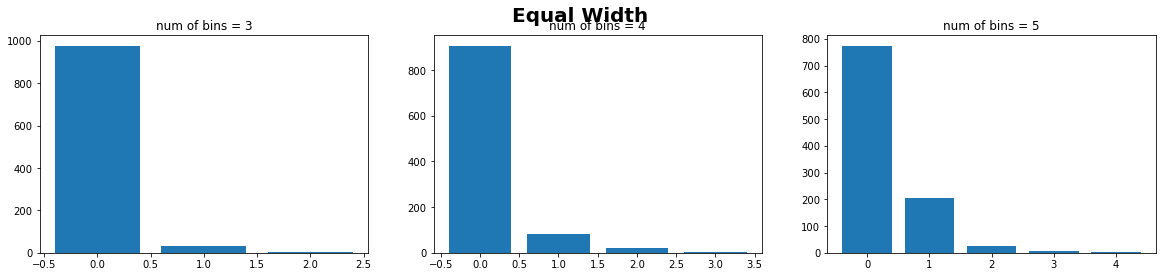

<Figure size 1440x1440 with 0 Axes>

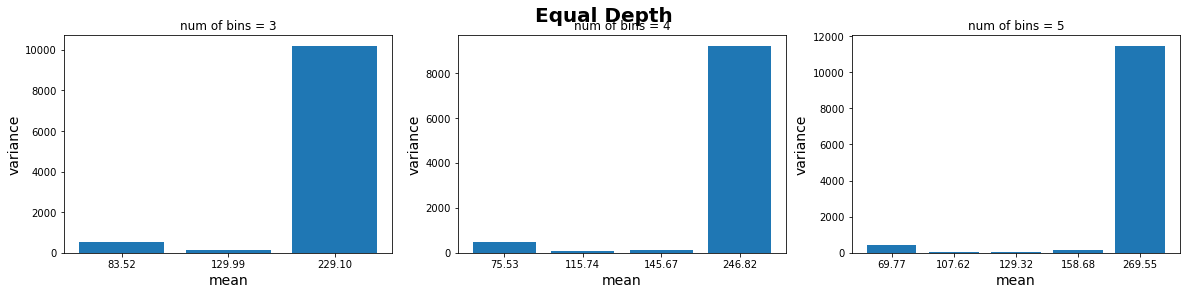

<Figure size 1440x1440 with 0 Axes>

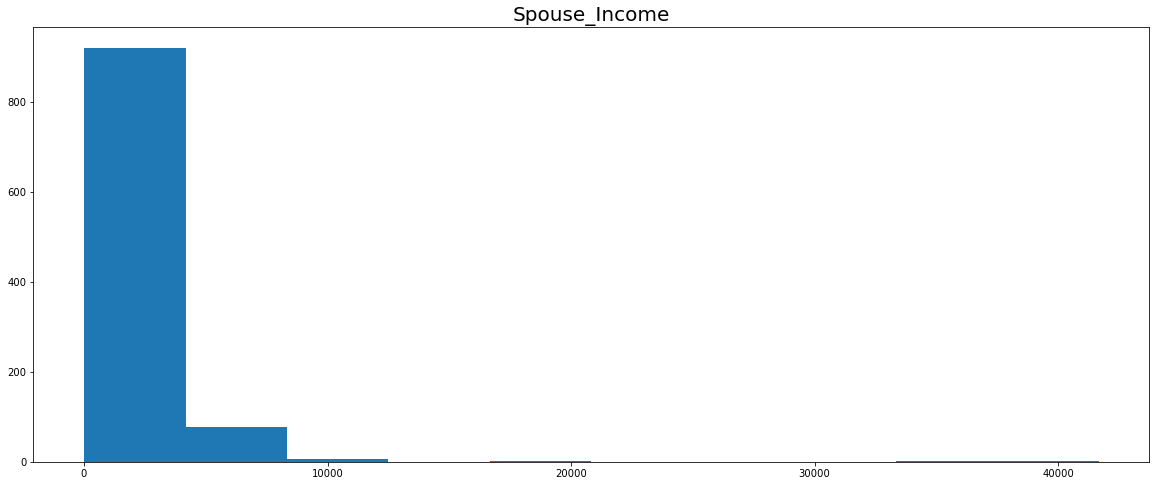

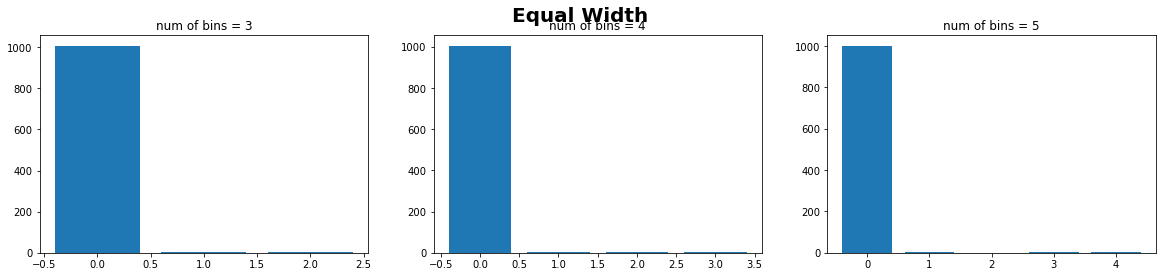

<Figure size 1440x1440 with 0 Axes>

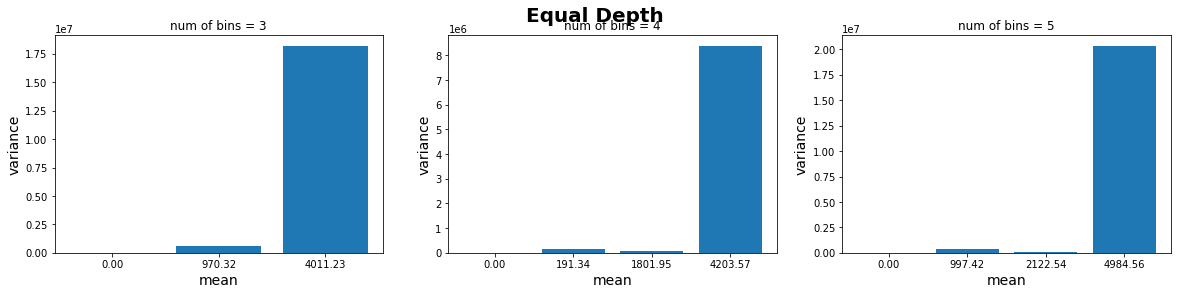

<Figure size 1440x1440 with 0 Axes>

In [84]:
for col in ['Monthly_Profit', 'Loan_Amount', 'Spouse_Income']:
    Discretization(col)
    plt.gcf()
    plt.savefig(f'{col}.png')

variance: 9180506.990803955
[1007.    2.    2.]
[1005.    2.    2.    2.]
[1001.    6.    0.    2.    2.]


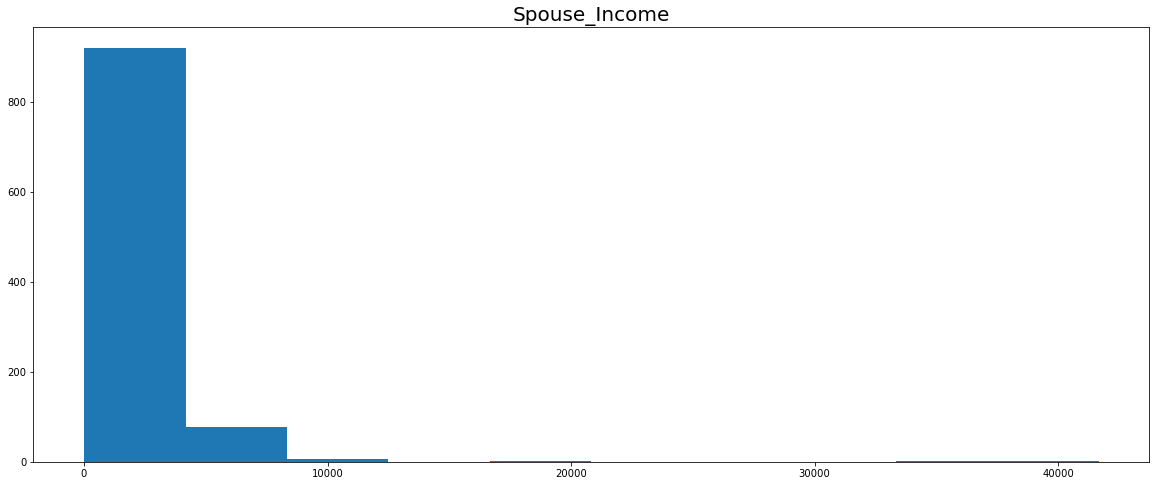

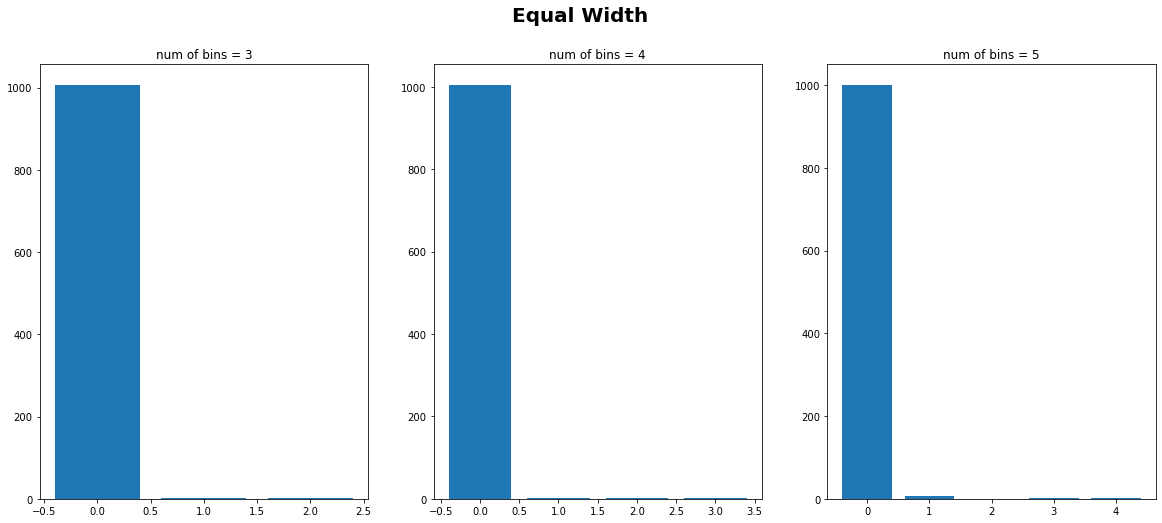

<Figure size 1440x1440 with 0 Axes>

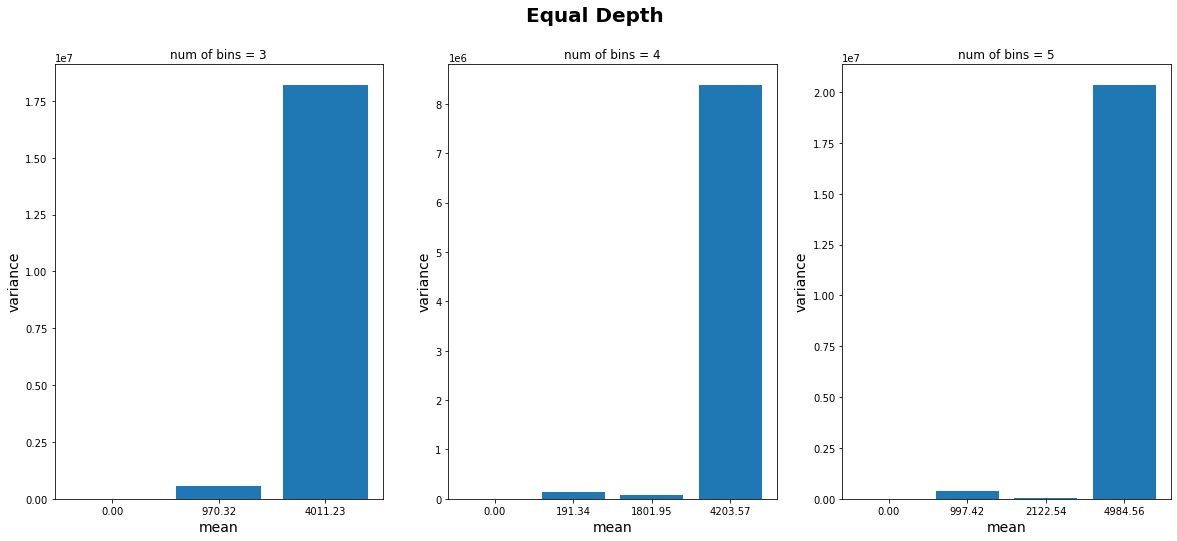

<Figure size 1440x1440 with 0 Axes>

In [15]:
Discretization('Spouse_Income')


In [15]:
df = pd.read_csv('3.csv')
df['Spouse_Income'].value_counts()

0.0       446
2500.0      9
2083.0      8
1666.0      7
5625.0      6
         ... 
3033.0      1
505.0       1
6250.0      1
1229.0      1
4083.0      1
Name: Spouse_Income, Length: 287, dtype: int64